<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Statistical_Inference/Statistical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created: 10-16-2023, Updated: 02-05-2024

Main reference: [Statistical Inference](https://github.com/ua-datalab/Workshops/wiki/Statistical-Inference)

# Examples of the most common [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution)

## Continuous distributions

* [Normal or Gaussian](https://en.wikipedia.org/wiki/Normal_distribution)
* [Log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution)
* [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
* [Continuous Uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

## Discrete distributions

* [Dicrete Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)
* [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
* [Binomial distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

We can generate statistical samples of a collection of probability distribution functions using the [Numpy random function generator](https://numpy.org/doc/stable/reference/random/generator.html).

## Probability Distribution Functions Summary

Every probability distribution can be described in an alternate way using a [Moment-generating function](https://en.wikipedia.org/wiki/Moment-generating_function). This function is an infinite series,  each term of this is called a [moment](https://en.wikipedia.org/wiki/Moment_(mathematics)).

The first moment M1 is the
 [expected moment](https://en.wikipedia.org/wiki/Expected_value),
a.k.a. [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean), the [second central moment](https://en.wikipedia.org/wiki/Central_moment) M2 is the [variance](https://en.wikipedia.org/wiki/Variance), the [third standardized moment](https://en.wikipedia.org/wiki/Standardized_moment) M3 is the [skewness](https://en.wikipedia.org/wiki/Skewness), the fourth moment M4 is the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis#), and so on...  

The next table summarizes the relationships between the distribution function parameters and their first four moments.

| Distribution | __  [mean](https://en.wikipedia.org/wiki/Arithmetic_mean): M1 __ | __ [variance](https://en.wikipedia.org/wiki/Variance): M2 __ | __ [skewness](https://en.wikipedia.org/wiki/Skewness): M3 __ | __ [Excess kurtosis](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis): M4 __ |
| :--:  | :--: |   :--: |  :--: |  :--: |
| Normal | $\mu$ | $\sigma^2$ | 0 | 0 |
| Exponential | $1/\lambda$ | $1/\lambda^2$ | 2 | 6 |
| Uniform | $(a + b)/2$ | $(n^2 - 1)/12$ | 0 | $- 6(n^2 + 1)/5(n^2 - 1)$ |
| Poisson | $\lambda$ | $\lambda$ | $1/\sqrt{\lambda}$ | $1/\lambda$ |
| Binomial | $np$ | $npq$ | $(q-p)/\sqrt{npq}$ | $(1 - 6 pq)/npq$ |


Code example:
```

import numpy as np
import scipy.stats as ss

### Specify Data
n  = 10000
m1 = 0
m2 = 1
# m3 =
# m4 =

### Generate synthetic data (Normal distribution)

x = np.random.normal(m1, m2, n)

# Compute the first four moments

M1 = np.mean(x)
M2 = np.var(x)
M3 = ss.skew(x)
M4 = ss.kurtosis(x)

```

## Normal distribution

The general form of its probability density function is

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

The parameter
$\mu$  is the mean or expectation of the distribution (and also its median and mode), while the parameter $\sigma^2$ is the _variance_
($\sigma$  is its standard deviation).


Distribution first four moments
M1 =  -0.0453
M2 = 0.9742
M3 = 0.0339
M4 = -0.0468


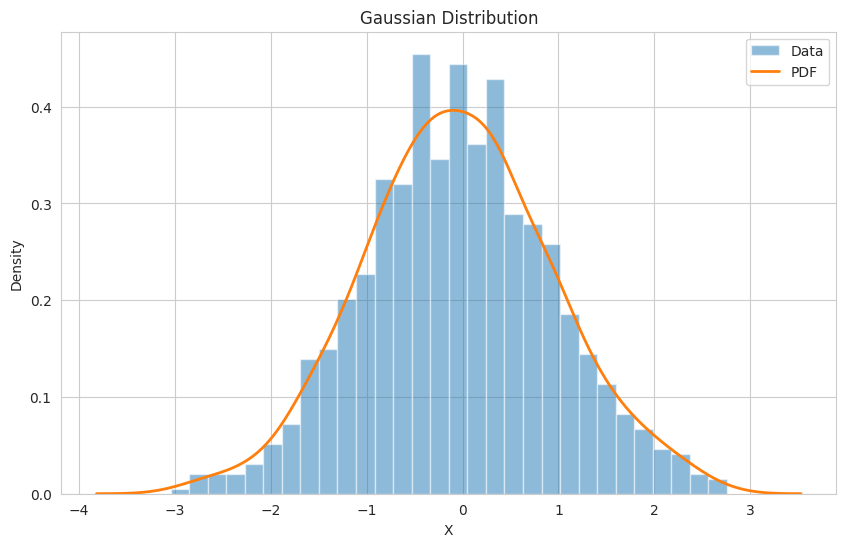

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as ss

sns.set_style("whitegrid")


# Generate Gaussian distributed data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # mean=0, std=1

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))


# Fit Gaussian distribution using statsmodels
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(kde.support, kde.density, lw=2, label='PDF')
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()


## Log-normal distribution

The probability density function is


$$
f(x | \mu, \sigma^2) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}
$$

where $\mu$ is the sample _mean_ and _variance_ = $\sigma^2$ is the standard deviation.



Distribution first four moments
M1 =  1.5560
M2 = 3.4773
M3 = 3.1694
M4 = 13.2869


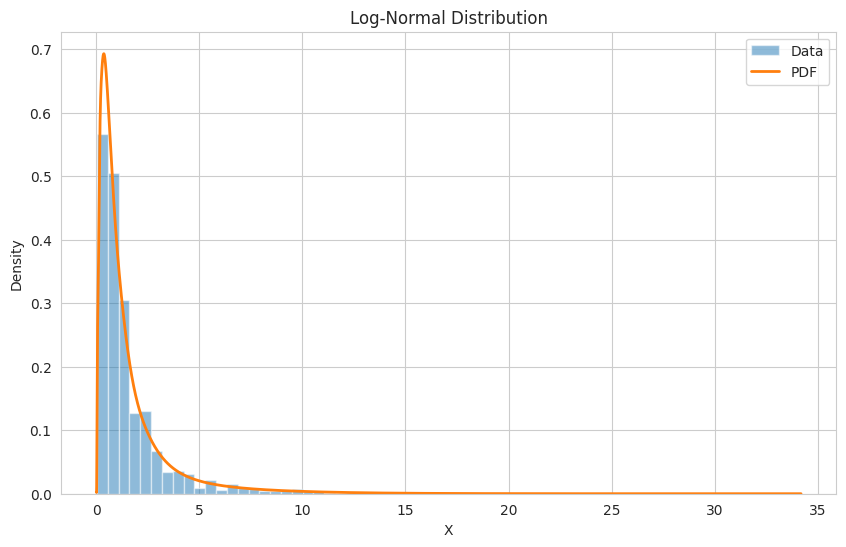

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss

# Generate log-normally distributed data
np.random.seed(0)
data = np.random.lognormal(mean=0, sigma=1, size=1000)  # mean=0, std=1

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))

# Fit log-normal distribution using statsmodels
kde = sm.nonparametric.KDEUnivariate(np.log(data))
kde.fit()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(np.exp(kde.support), kde.density / np.exp(kde.support), lw=2, label='PDF')
plt.title('Log-Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()


## Exponential distribution

 The probability density function (PDF) for the Exponential distribution is given by:

$$
f(x;\lambda) = \lambda e^{-\lambda x} \quad \text{for } x \geq 0, \lambda > 0
$$

with  _mean_ = $1/\lambda$ and _variance_ $1/\lambda^2$.

Distribution first four moments
M1 =  1.0035
M2 = 1.0590
M3 = 2.0526
M4 = 6.4761


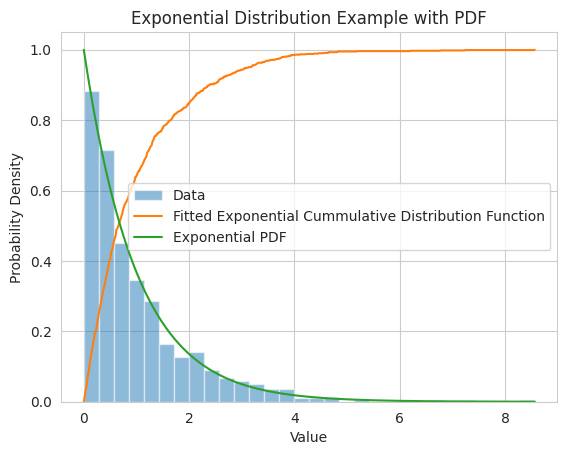

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import expon
import scipy.stats as ss

# Generate exponentially distributed data
np.random.seed(0)
data = np.random.exponential(scale=1.0, size=1000) # mean = 1

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))


# Plot histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Fit exponential distribution using statsmodels
ecdf = sm.distributions.ECDF(data)
x = np.linspace(min(data), max(data), 1000)
y = ecdf(x)

# Plot the fitted exponential distribution
plt.plot(x, y, label='Fitted Exponential Cummulative Distribution Function')

# Plot the PDF of the exponential distribution for comparison
pdf_x = np.linspace(min(data), max(data), 1000)
pdf_y = expon.pdf(pdf_x)
plt.plot(pdf_x, pdf_y, label='Exponential PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Exponential Distribution Example with PDF')
plt.show()



# Discrete probability distribution functions

## Discrete uniform distribution.

For $N$ discrete  values between _a_ and _b_, the _mean_ is $\frac{a+b}{2}$ and the _variance_ is $\frac{n^2 -1}{12}$



Distribution first four moments
M1 =  3.5190
M2 = 2.9376
M3 = -0.0299
M4 = -1.2623


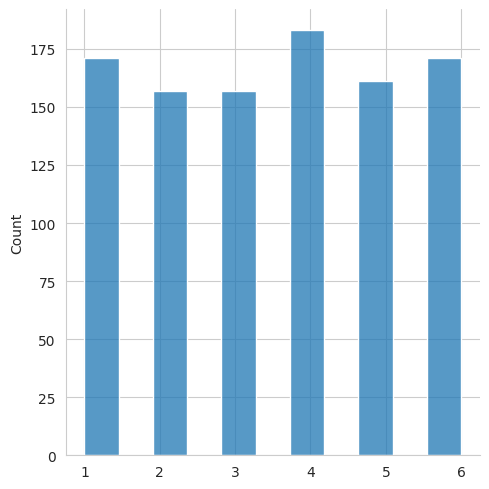

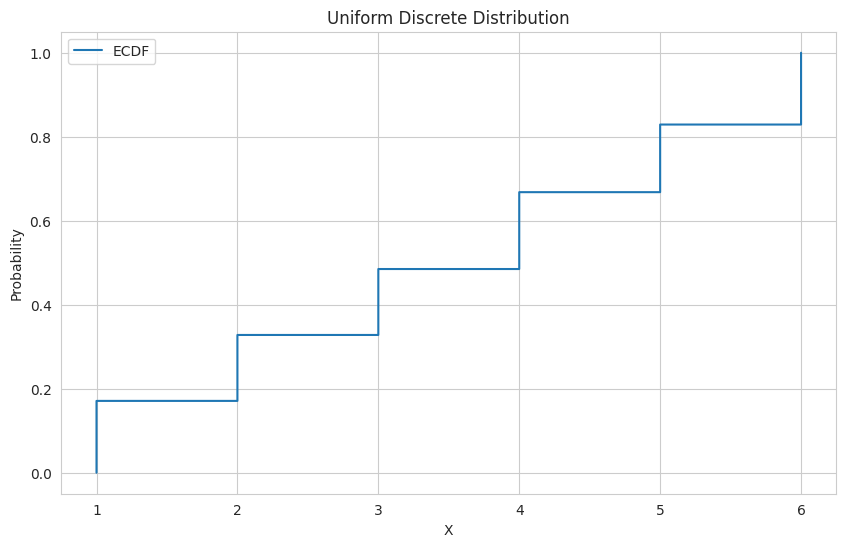

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss

# Generate uniform discrete distributed data
np.random.seed(0)
data = np.random.randint(1, 7, size=1000)  # Simulating a fair 6-sided die

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))

# Plot the uniformly distributed random sample.
_ = sns.displot(data)

# Fit uniform discrete distribution using statsmodels
ecdf = sm.distributions.ECDF(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF')
plt.title('Uniform Discrete Distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()


This code snippet employs the _Empirical Cumulative Distribution Function (ECDF)_ from `statsmodels` to describe the distribution of the generated uniform discrete data.

## Poisson distribution

$$
P(X=k) = \frac{{\lambda^k \cdot e^{-\lambda}}}{{k!}}
$$

$k$ is the number of occurrences ($k = 0,1,2,3, \ldots)$ and $\lambda$ is the _mean_. The _variance_ is also equal to $\lambda$.


Distribution first four moments
M1 =  4.9570
M2 = 4.7012
M3 = 0.3996
M4 = -0.0946


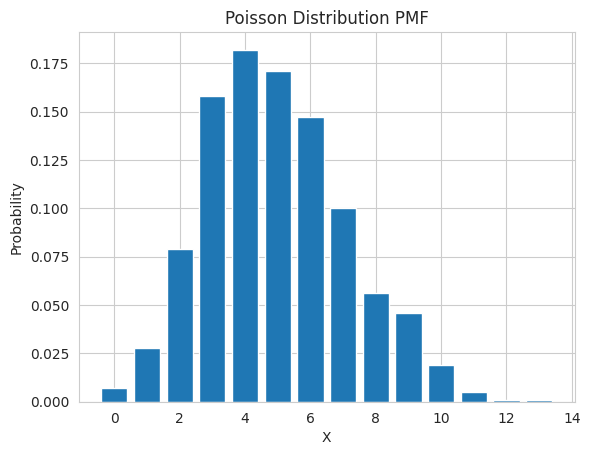

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss

# Generate Poisson distributed data
lambda_param = 5 # mean and variance.
data = np.random.poisson(lambda_param, 1000)

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))

# Calculate PMF using statsmodels
unique, counts = np.unique(data, return_counts=True)
pmf = counts / len(data)

# Plotting
plt.bar(unique, pmf)
plt.title('Poisson Distribution PMF')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()



## Binomial Distribution

The probability mass function (PMF) for a Binomial distribution is given by:

$$
P(X=k) = \binom{n}{k} \times p^{ k } \times (1-p)^{(n-k)}
$$

for $k = 0, 1, 2, ..., n$, and where

$$
\binom{n}{k} = \frac{n!}{k! (n-k)!}
$$

The _mean_ is $np$, and _variance_ is $npq = np (1-p)$.

Distribution first four moments
M1 =  4.9840
M2 = 2.6657
M3 = 0.0106
M4 = -0.1477


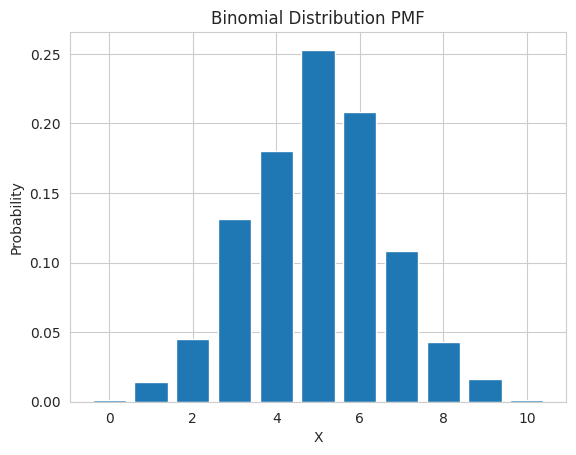

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as ss

# Generate Binomial distributed data
n_trials = 10
p_success = 0.5
data = np.random.binomial(n_trials, p_success, 1000) # mean = n*p, variance = n*p*(1-p)

### Confirm moments consistency of this distribution

M1 = np.mean(data)
M2 = np.var(data)
M3 = ss.skew(data)
M4 = ss.kurtosis(data)

print("Distribution first four moments")
print("M1 =  {:.4f}\nM2 = {:.4f}\nM3 = {:.4f}\nM4 = {:.4f}".format(M1, M2, M3, M4))

# Calculate PMF using statsmodels
unique, counts = np.unique(data, return_counts=True)
pmf = counts / len(data)

# Plotting
plt.bar(unique, pmf)
plt.title('Binomial Distribution PMF')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


Binomial-distributed data with 10 trials and a success probability of 0.5. It then calculates and plots the PMF.
